In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn import metrics

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [5]:
cols = {'setosa':0,'versicolor':1,'virginica':2}
iris['species_num'] = iris['species'].map(cols)

In [61]:
iris.loc[80:100,]

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
80,5.5,2.4,3.8,1.1,versicolor,1
81,5.5,2.4,3.7,1.0,versicolor,1
82,5.8,2.7,3.9,1.2,versicolor,1
83,6.0,2.7,5.1,1.6,versicolor,1
84,5.4,3.0,4.5,1.5,versicolor,1
85,6.0,3.4,4.5,1.6,versicolor,1
86,6.7,3.1,4.7,1.5,versicolor,1
87,6.3,2.3,4.4,1.3,versicolor,1
88,5.6,3.0,4.1,1.3,versicolor,1
89,5.5,2.5,4.0,1.3,versicolor,1


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
species_num     150 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


/Users/davidtorres/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/davidtorres/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/davidtorres/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/davidtorres/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, d

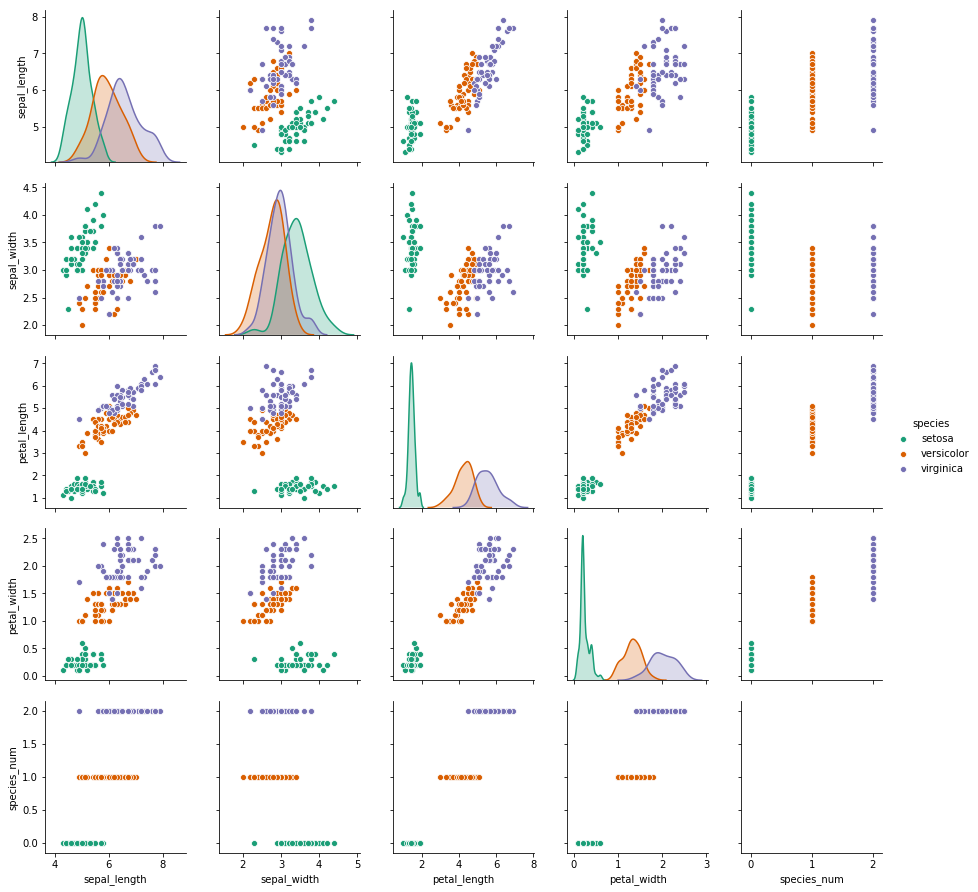

In [8]:
sns.pairplot(iris, hue='species', palette='Dark2');

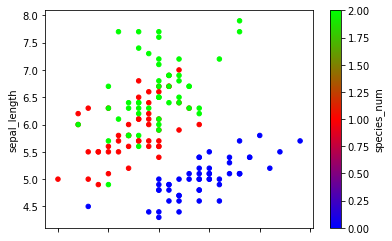

In [9]:
iris.plot(x='sepal_width',y='sepal_length', c='species_num',kind='scatter', colormap='brg');

In [10]:
X = iris.drop(['species','species_num'], axis=1)
y = iris['species']

In [11]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [36]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(100, 4)
(100,)
(50, 4)
(50,)


In [37]:
from sklearn.svm import SVC

In [38]:
model = SVC()
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
pred = model.predict(X_test)

In [58]:
x_new = [7.0,3.2,4.7,1.4]
y_pred = model.predict([x_new])
y_pred

array(['versicolor'], dtype=object)

In [65]:
x_new_1 = [6.3,3.3,6.0,2.5]
y_pred_1 = model.predict([x_new_1])
y_pred_1

array(['virginica'], dtype=object)

In [40]:
from sklearn import metrics
print('Accuracy Score', metrics.accuracy_score(y_test,pred))

Accuracy Score 1.0


In [41]:
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
print('Confusion Matrix: \n', confusion_matrix(y_test,pred))

Confusion Matrix: 
 [[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


In [43]:
print('Classification Report: \n', classification_report(y_test, pred))

Classification Report: 
              precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        19
 versicolor       1.00      1.00      1.00        15
  virginica       1.00      1.00      1.00        16

avg / total       1.00      1.00      1.00        50



In [44]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [47]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [48]:
grid.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
grid_predict = grid.predict(X_test)

In [50]:
confusion_matrix(y_test,grid_predict)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 16]])

In [51]:
print('Classification Report: \n', classification_report(y_test, grid_predict))

Classification Report: 
              precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        19
 versicolor       1.00      1.00      1.00        15
  virginica       1.00      1.00      1.00        16

avg / total       1.00      1.00      1.00        50

